<a href="https://colab.research.google.com/github/Hashiramaz/GC/blob/main/vinicius_nascimento_aula3_machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Matricula: 0050013232
2.   Aluno: Vinicius Nascimento






In [1]:
import pandas as pd 

from sklearn.datasets import load_boston

dataset = load_boston()

data = pd.read_csv("https://github.com/justmarkham/scikit-learn-videos/raw/master/data/Advertising.csv")

1-Mostre os primeiros registros da tabela

In [2]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


2-Observações(linhas) possui nessa base? Quantas Colunas?

In [4]:
data.shape

(200, 5)

3-Quantas Features Possui?
3 Features

4-Qual é o campo Target(respostas) dessa base?
Sales

5-Usando a biblioteca de visualização seaborn, plote o gráfico que mostra a relação entre as features e responses

In [5]:

# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


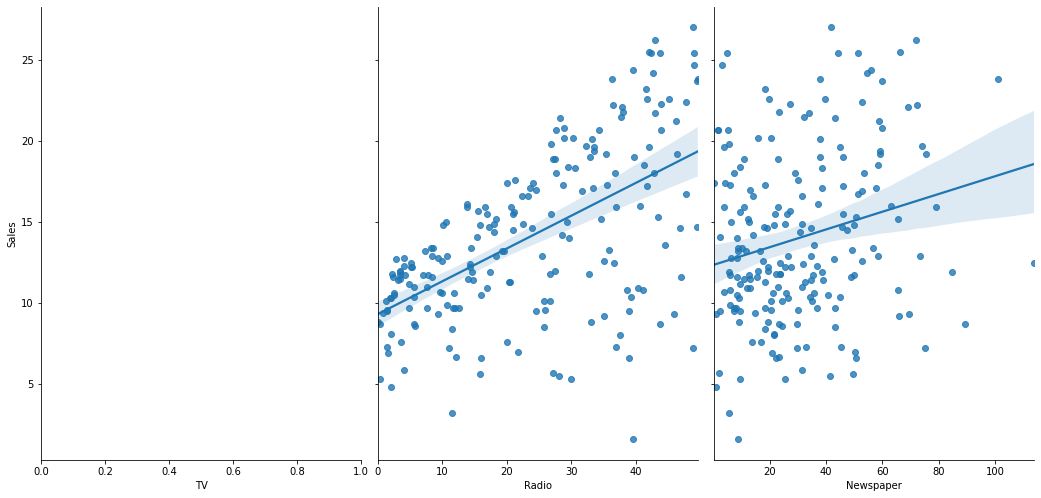

In [8]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

6-Prepare X e y usando o pandas

In [9]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

7-Qual o tipo de dados de X e y?

In [12]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [14]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


8-Sobre o que se trata essa base de dados? Que tipo de informações ela guarda?

9-Gere um X de treino e y de treino, X de teste e y da base (Split Train/Test)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

10-Qual o percentual gerado para criar o conjunto de treino e o conjunto de teste?

a divisão padrão é 75% para treinamento e 25% para teste

11-Usando modelo de regressão linear do sklearn, treine o modelo com o X e y de treino

In [17]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

12-Imprima os atributos de "intercept" e "coefficients" que foram gerados

In [18]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


13-imprima o par "feature names" com os "coefficients"

In [19]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

14-Faça uma previsão usando o conjunto de X de teste

In [20]:
y_pred = linreg.predict(X_test)

15-Mostre a margem de error, usando o método "Root Mean Squared Error (RMSE)"

In [25]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [26]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [27]:

# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [28]:
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


16-Existe uma forma de melhorar essa margem para que fique menor? Se sim, como seria?

Sim, podemos remover o campo NewsPaper para ter uma precisão melhor

In [29]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888
